In [1]:
import pandas as pd

In [2]:
students = pd.read_csv("cursostomados.csv", 
                           dtype='str')

In [3]:
students.iloc[[1,200,54,99],1:]

,Curso,Sesion,Nota
1,CISO3122,921,C
200,CCOM3033,B31,B
54,EDFU3002,991,A
99,HUMA3101,A91,B


In [4]:
def makesequences(table):
    sequences = {}
    
    for index, Numest, Curso, Sesion, Nota in students.itertuples():
        if Numest not in sequences:
            sequences[Numest] = [(Curso, Sesion, Nota)]
        else:
            sequences[Numest].append((Curso, Sesion, Nota))
    
    return sequences

In [5]:
def codetonum(code):
    decade = code[0] 
    year = code[1]
    semester = code[2]
    time = 1900 + int(decade, base=16) * 10 + int(year) + 0.5 * (int(semester) - 1)
    return time

In [6]:
sequences = makesequences(students)

In [7]:
len(sequences.keys())

476

In [8]:
prog2007 = ['MATE3018', 'MATE3023', 'MATE3024', # should have tested out of these pre calc
            'CCOM3033', 'MATE3151', 'CCOM3034', 'MATE3152',
            'CCOM4016', 'CCOM4017', 'CCOM4027', 'MATE3153',
            'CCOM4086', 'CCOM3029', 'MATE4032',
            'CCOM5050', 'MATE4080',
            'CCOM4087', 'CCOM5035'
           ]

In [9]:
prog2011 = ['MATE3018', 'MATE3023', 'MATE3024', # should have tested out of these pre calc
            'MATE3151', 'CCOM3030', 'CCOM3981', # espa soc eng
            'CCOM3020', 'CCOM3033', 'CCOM3982', # soc espa eng
            'MATE3152', 'CCOM3034', 'CCOM4016', 'CCOM4086', # sci huma
            'MATE4081', 'MATE4032', 'CCOM4027', 'CCOM4029', # sci huma
            'MATE4080', 'CCOM4017', 'CCOM4030', # libre lite
            'CCOM5050', 'CCOM4065', 'CCOM4205', # art lite
            'MATE5001', 'CCOM5035', 'CCOM4995', # SCI SCI
            'CCOM4996', 'CCOM4087']

In [10]:
prog2016 = ['MATE3018', 'MATE3023', 'MATE3024', # should have tested out of these pre calc
            'MATE3151', 'CCOM3030', 'CCOM3981', # espa soc eng
            'CCOM3020', 'CCOM3033', 'CCOM3982', # soc espa eng
            'MATE3152', 'CCOM3034', 'CCOM4086', # sci huma
            'MATE4081', 'MATE4032', 'CCOM4027', 'CCOM4029', # sci huma
            'MATE4080', 'CCOM4017', 'CCOM4030', # libre lite
            'CCOM5050', 'CCOM4065', 'CCOM4205', # art lite
            'MATE5001', 'CCOM5035', 'CCOM4995', # SCI SCI
            'CCOM4996', 'CCOM4087']

In [11]:
def clean(students, core):
    "Filter students, return only core courses"
    clean = {}
    for student, courselist in students.items():
        cleanlist = []
        for course, sem, grade in courselist:
            if course in core:
                cleanlist.append((course, sem, grade))
        if len(cleanlist) > 0:
            clean[student] = cleanlist
    return clean

In [12]:
newstu = clean(sequences, prog2011)

In [13]:
from collections import defaultdict

In [14]:
def getseq(students):
    freqs = defaultdict(int)
    for student in students.keys():
        for i in range(len(students[student])):
            course, elapsed, grade = students[student][i]
            freqs[course] += i
    return list(map(lambda item: item[0], sorted(freqs.items(), key=lambda item: (item[1], item[0]))))

In [15]:
cs_seq = getseq(newstu)

In [16]:
cs_seq

['CCOM4065',
 'MATE3018',
 'CCOM4205',
 'CCOM3030',
 'CCOM4016',
 'CCOM4996',
 'MATE3023',
 'CCOM3981',
 'MATE3024',
 'MATE4081',
 'CCOM3982',
 'CCOM4029',
 'MATE5001',
 'CCOM4030',
 'CCOM3020',
 'CCOM3033',
 'CCOM3034',
 'MATE3151',
 'CCOM4086',
 'CCOM4027',
 'CCOM4017',
 'MATE4032',
 'CCOM4995',
 'CCOM5035',
 'MATE3152',
 'MATE4080',
 'CCOM4087',
 'CCOM5050']

In [17]:
import numpy as np

In [18]:
rows = len(cs_seq)
counts = np.zeros(rows * rows).reshape(rows,rows)

In [19]:
for stu in newstu:
    courses = [course for course, sem, grade in newstu[stu] if course in cs_seq]
    courses = list(dict.fromkeys(courses)) # unique, preserving order, first occurrence
    for i in range(len(courses)):
        row = cs_seq.index(courses[i])
        counts[row,i] += 1

In [20]:
counts = pd.DataFrame(counts, index=cs_seq)

In [21]:
%matplotlib inline

In [22]:
import seaborn as sns; sns.set()

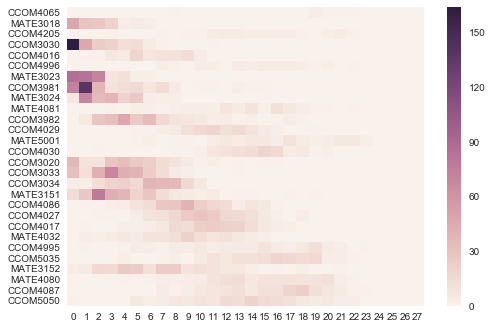

In [23]:
ax = sns.heatmap(counts)

In [24]:
def heatmap(students, cs_seq):
    rows = len(cs_seq)
    cols = 17
    counts = np.zeros(rows * cols).reshape(rows,cols)
    counts = pd.DataFrame(counts, index=cs_seq)
    for stu in students:
        courses = [(course, sem, grade) for course, sem, grade in students[stu] if course in cs_seq]
        #print(courses)
        courses = semesters(courses)
        for i in range(len(courses)):
            course, sem, grade = courses[i]
            #print(course)
            row = cs_seq.index(course)
            if sem >= cols:
                sem = cols-1
            counts.iat[row,sem] += 1
    return counts

In [25]:
def failmap(students, cs_seq):
    rows = len(cs_seq)
    cols = 17
    counts = np.zeros(rows * cols).reshape(rows,cols)
    counts = pd.DataFrame(counts, index=cs_seq)
    for stu in students:
        courses = [(course, sem, grade) for course, sem, grade in students[stu] if course in cs_seq]
        #print(courses)
        courses = semesters(courses)
        for i in range(len(courses)):
            course, sem, grade = courses[i]
            #print(course)
            row = cs_seq.index(course)
            if sem >= cols:
                sem = cols-1
            if grade in ["F", "F*", "NP", "NP*"]:
                counts.iat[row,sem] += 1
    return counts

In [26]:
def codetosem(code):
    decade = code[0] 
    year = code[1]
    semester = code[2]
    time = 1900 + int(decade, base=16) * 10 + int(year) + 0.5 * (int(semester) - 1)
    return time

In [27]:
def semesters(courses):
    "Read a list of course, semester tuples and write out relative timeline"
    course, start, grade = courses[0]
    first_sem = codetosem(start)
    last_sem = 0
    sequence = []
    for course, semester, grade in courses:
        now = codetonum(semester)
        
        elapsed = now-first_sem
        elapsed *= 2
        sequence.append((course, int(elapsed), grade))
    return sequence

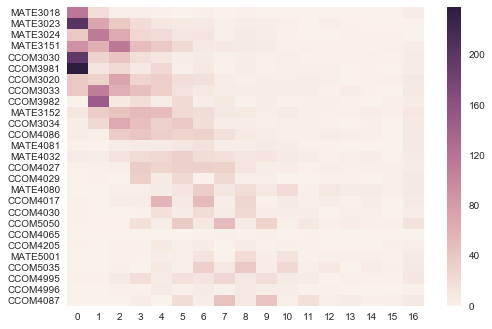

In [28]:
ax = sns.heatmap(heatmap(clean(sequences, prog2016), prog2016),cmap = None)

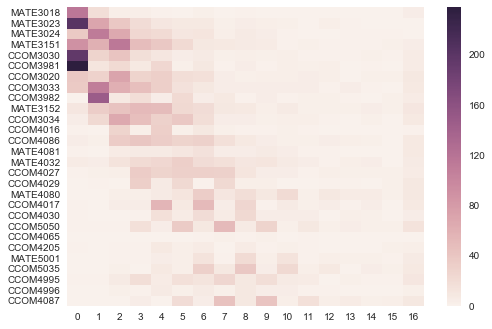

In [29]:
ax = sns.heatmap(heatmap(clean(sequences, prog2011), prog2011),cmap = None)

CCOM4016 was a pre-requisite for CCOM4086 until 2011. What is now MATE4081 was MATE4032 until two years ago.

Find students that took precalc in UPR

In [30]:
def took(courses, course):
    "Return true if student took a given course"
    return course in list(map(lambda row: row[0], courses))

In [31]:
precalc_stu = {k: v for k, v in sequences.items() if (took(v, 'MATE3018') or took(v, 'MATE3024'))}

In [32]:
len(dict(precalc_stu))

318

In [33]:
precalc_failcounts = failmap(precalc_stu, prog2016)

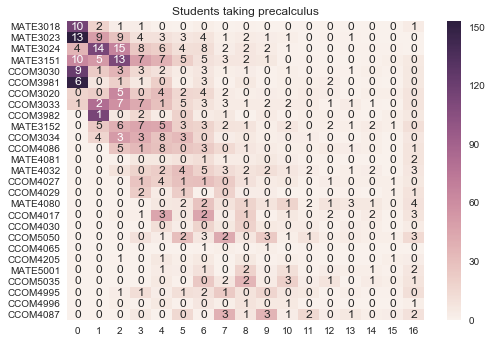

In [34]:
ax = sns.heatmap(heatmap(clean(precalc_stu, prog2016), prog2016),cmap = None, annot=precalc_failcounts)
ax.set(title="Students taking precalculus")

The above plot is shaded by the number of students taking the course indicated in the row at the semester indicated in the column. Numbers in cells is the number of students failing the course.

In [35]:
calc_stu = {k: v for k, v in sequences.items() if (not took(v, 'MATE3018') and not took(v, "MATE3024"))}

In [36]:
len(calc_stu)

158

In [37]:
318+158 # sanity check, do I still have all the students?

476

In [38]:
calc_failcount = failmap(clean(calc_stu, prog2016[3:]), prog2016[3:])

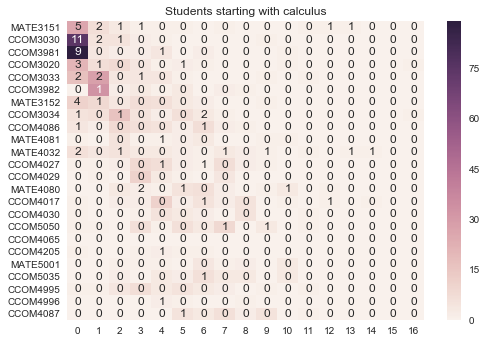

In [39]:
ax = sns.heatmap(heatmap(clean(calc_stu, prog2016[3:]), prog2016[3:]), cmap = None, annot=calc_failcount)
ax.set(title="Students starting with calculus")

The above plot is shaded by the number of students taking the course indicated in the row at the semester indicated in the column. Numbers in cells is the number of students failing the course.

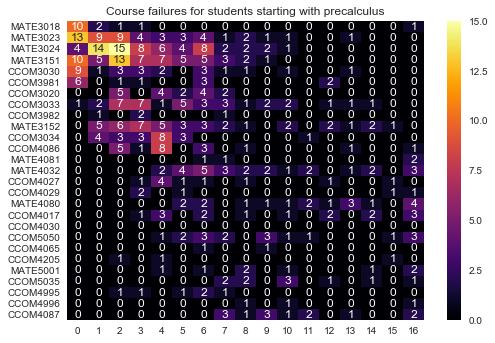

In [40]:
ax = sns.heatmap(precalc_failcounts,cmap = "inferno", annot=precalc_failcounts)
ax.set(title="Course failures for students starting with precalculus")

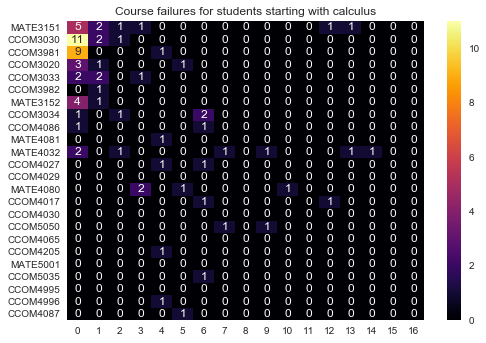

In [41]:
ax = sns.heatmap(calc_failcount, cmap = "inferno", annot=calc_failcount)
ax.set(title="Course failures for students starting with calculus")

# Cohorts

Patti sugested looking at cohorts based on when they took CCOM3030.


In [42]:
intro = students.loc[students["Curso"] == "CCOM3030"]

In [43]:
intro.iloc[0:5,1:3]

,Curso,Sesion
92,CCOM3030,A71
102,CCOM3030,A92
142,CCOM3030,B32
171,CCOM3030,B22
175,CCOM3030,B31


In [44]:
cohorts = {}
for row in intro.itertuples():
    #print (row)
    index, Numest, Curso, Sesion, Nota = row
    if Sesion not in cohorts:
        cohorts[Sesion] = [Numest]
    else:
        cohorts[Sesion].append(Numest)

In [45]:
cohort_keys = sorted(cohorts.keys())

Can plot heatmap for each cohort.

In [46]:
heatmaps = []
failmaps = []
for semester in cohort_keys:
    ids = cohorts[semester]
    cohort = {k : sequences[k] for k in ids}
    heatmaps.append(heatmap(cohort, prog2016))
    failmaps.append(failmap(cohort, prog2016))

In [47]:
import matplotlib.pyplot as plt

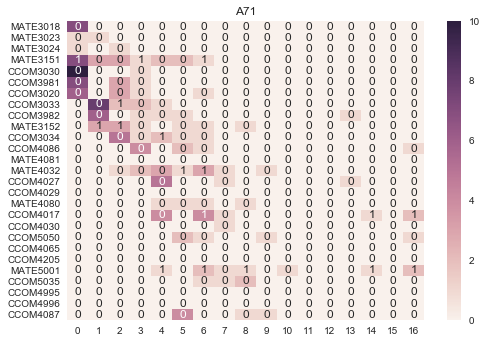

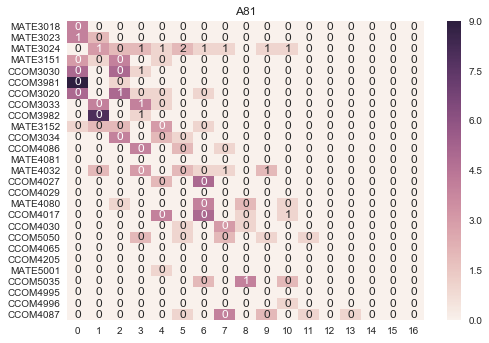

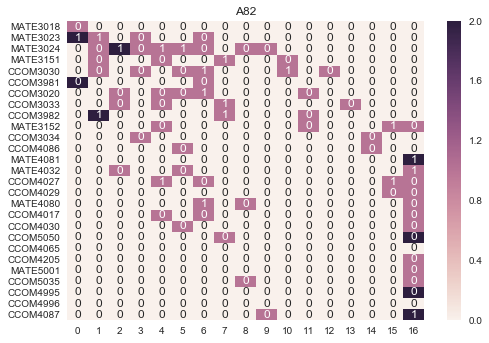

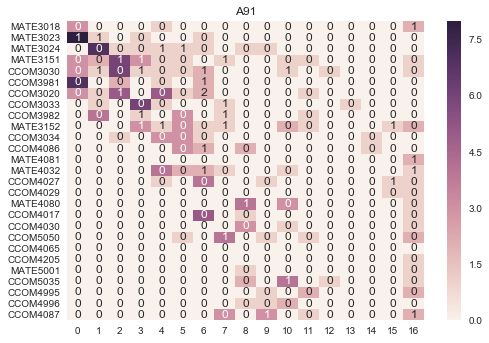

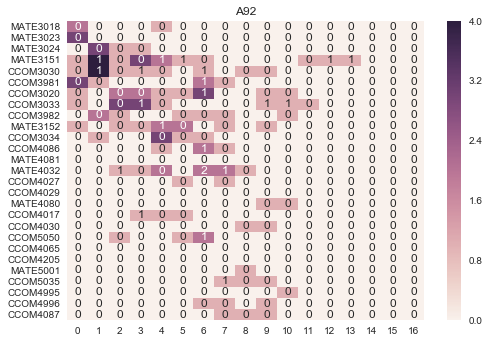

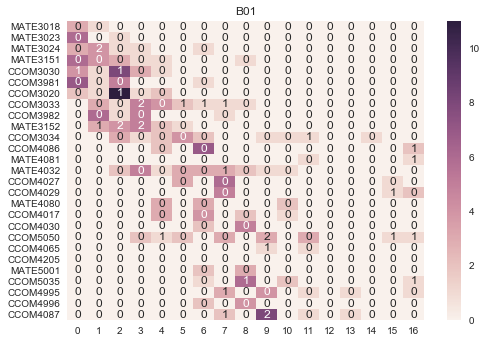

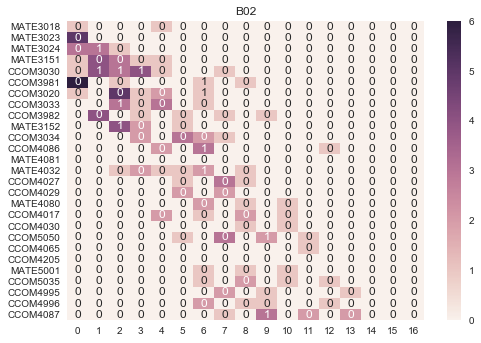

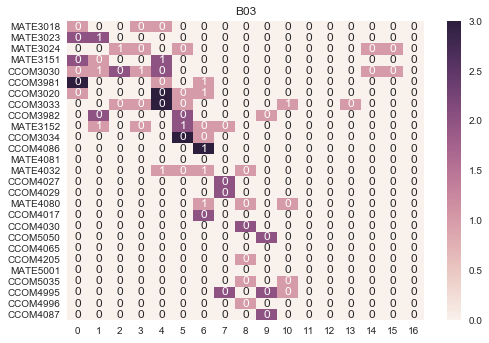

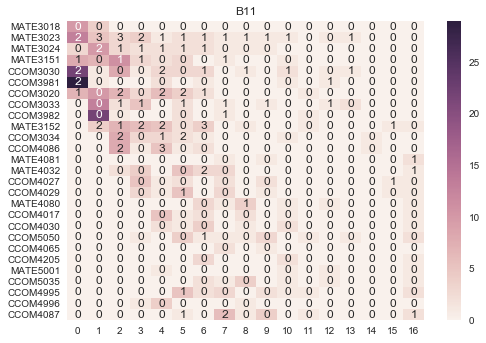

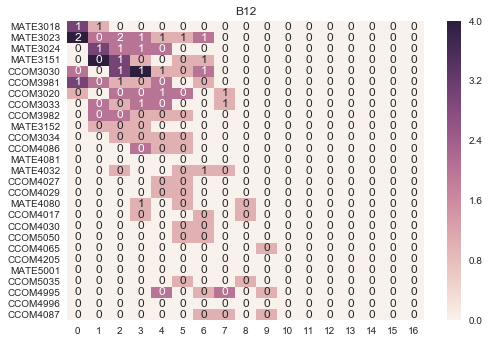

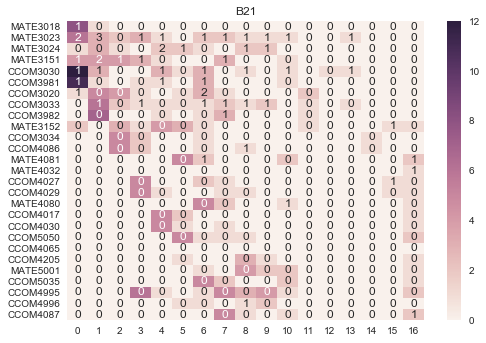

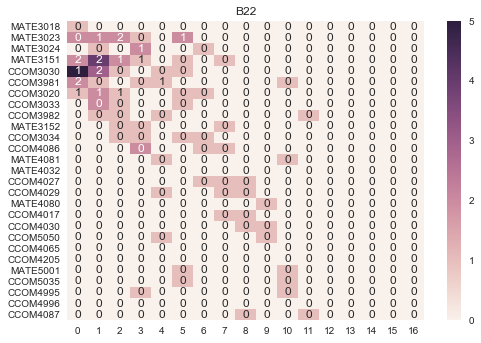

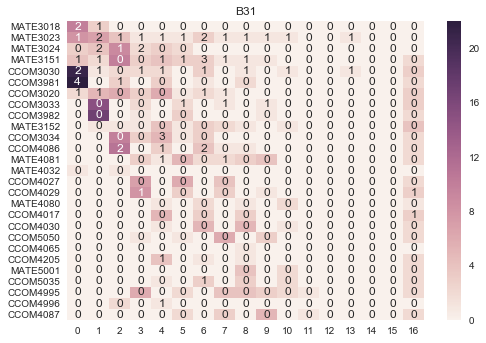

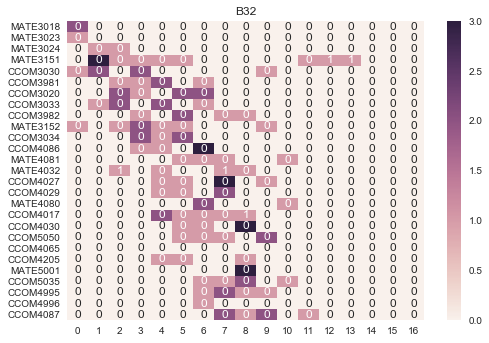

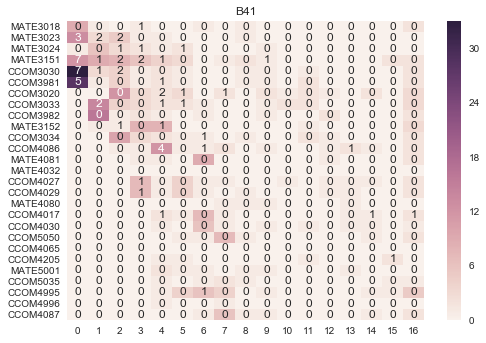

In [48]:
for i in range(15): # just the first 7 years
    ax = sns.heatmap(heatmaps[i], annot=failmaps[i])
    ax.set(title=cohort_keys[i])
    plt.show()

# Cohorts (pre 2007, post 2007)

Carlos suggested examining progression before CCOM3030 (implemented in 2007 academic year) and after.

In [49]:
caocohorts = defaultdict(list)
known = []
for row in students.itertuples():
    #print (row)
    index, Numest, Curso, Sesion, Nota = row
    if Numest not in known:
        caocohorts[Sesion].append(Numest)
        known.append(Numest)

In [50]:
cao_keys = sorted(caocohorts.keys())

In [51]:
# find all students before 2007
list(filter(lambda semester: semester < "A71", cao_keys))

['821',
 '921',
 '961',
 '971',
 '981',
 '991',
 'A01',
 'A11',
 'A12',
 'A21',
 'A31',
 'A41',
 'A51',
 'A52',
 'A61',
 'A62']

In [52]:
pre_stu = []
for sem in list(filter(lambda semester: semester < "A71", cao_keys)):
    pre_stu += caocohorts[sem]

In [53]:
cohort = {k:sequences[k] for k in pre_stu}

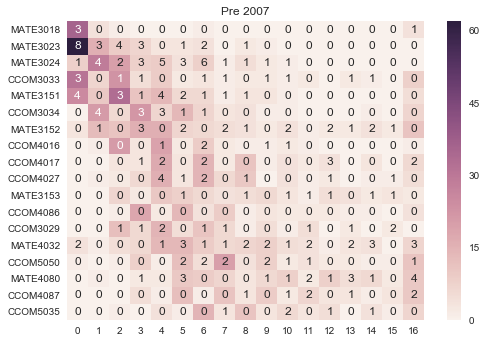

In [54]:
ax = sns.heatmap(heatmap(clean(cohort,prog2007), prog2007), annot=failmap(clean(cohort, prog2007), prog2007))
ax.set(title="Pre 2007")
plt.show()

In [55]:
post_stu = []
for sem in list(filter(lambda semester: semester >= "A71", cao_keys)):
    post_stu += caocohorts[sem]

In [56]:
post_cohort = {k:sequences[k] for k in post_stu}

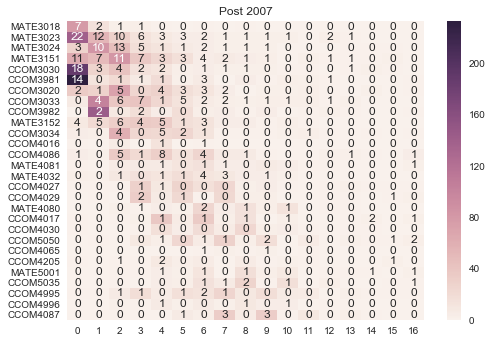

In [57]:
ax = sns.heatmap(heatmap(clean(post_cohort,prog2011), prog2011), annot=failmap(clean(post_cohort, prog2011), prog2011))
ax.set(title="Post 2007")
plt.show()

# Discrete math

Ive asks how student's grade in discrete math affects their progress.

In [58]:
def got(courses, course, grades):
    "Return true if student took a given course and obtained one of the given grades on the first try"
    gotit = False
    for row in courses:
        code, section, grade = row
        if code == course:
            if str(grade) in grades:  # there's a 'nan' value in the grades!
                gotit = True
            break # don't count any more attempts on this course
    return gotit

In [59]:
discrete_stu = {k: v for k, v in sequences.items() if took(v, 'CCOM3020')}

In [60]:
len(discrete_stu)

200

In [61]:
aorb_discrete_stu = {k: v for k, v in discrete_stu.items() if got(v, 'CCOM3020', "AB")}

In [62]:
len(aorb_discrete_stu)

61

In [63]:
ctof_discrete_stu = {k: v for k, v in discrete_stu.items() if not got(v, 'CCOM3020', "AB")}

In [64]:
len(ctof_discrete_stu)

139

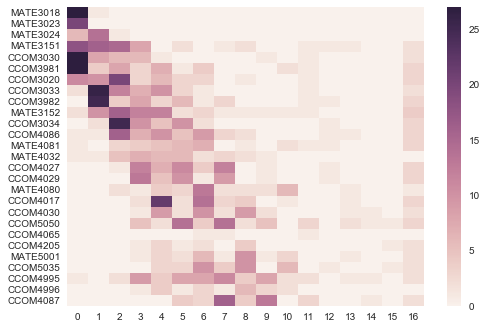

In [65]:
ax = sns.heatmap(heatmap(clean(aorb_discrete_stu, prog2016), prog2016),cmap = None)

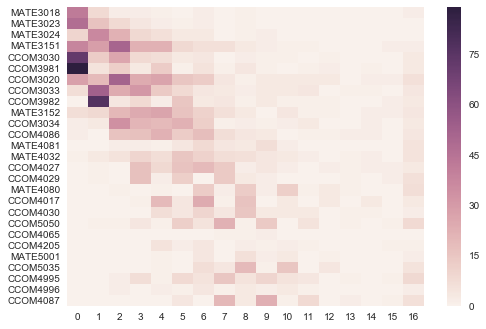

In [66]:
ax = sns.heatmap(heatmap(clean(ctof_discrete_stu, prog2016), prog2016),cmap = None)

Students that got a or b in discrete failing any course

In [67]:
aorb_failcounts = failmap(clean(aorb_discrete_stu, prog2016), prog2016)

In [68]:
ctof_failcounts = failmap(clean(ctof_discrete_stu, prog2016), prog2016)

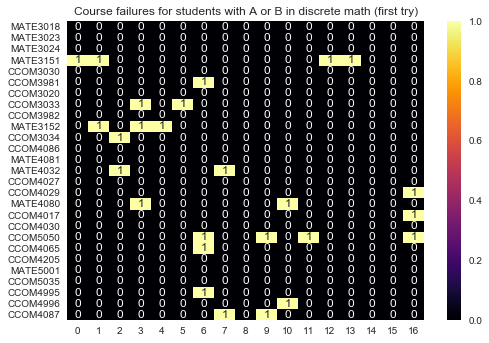

In [69]:
ax = sns.heatmap(aorb_failcounts,cmap = "inferno", annot=aorb_failcounts)
ax.set(title="Course failures for students with A or B in discrete math (first try)")

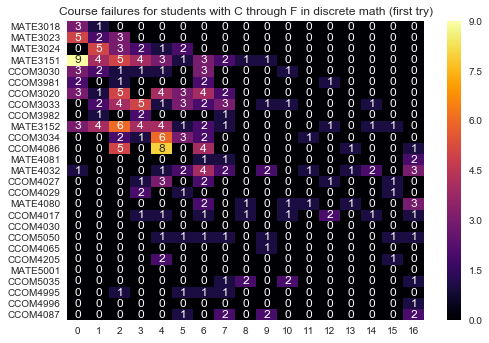

In [70]:
ax = sns.heatmap(ctof_failcounts,cmap = "inferno", annot=ctof_failcounts)
ax.set(title="Course failures for students with C through F in discrete math (first try)")

In [71]:
justc_discrete_stu = {k: v for k, v in discrete_stu.items() if got(v, 'CCOM3020', "C")}

In [72]:
len(justc_discrete_stu)

67

In [73]:
justc_failcounts = failmap(clean(justc_discrete_stu, prog2016), prog2016)

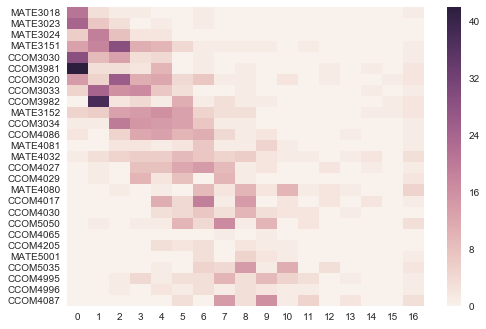

In [74]:
ax = sns.heatmap(heatmap(clean(justc_discrete_stu, prog2016), prog2016),cmap = None)

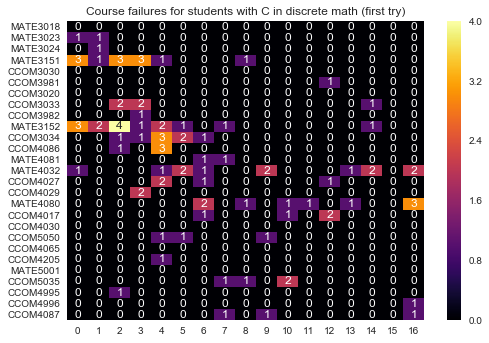

In [75]:
ax = sns.heatmap(justc_failcounts,cmap = "inferno", annot=justc_failcounts)
ax.set(title="Course failures for students with C in discrete math (first try)")

What about calculus? That's another requirement for students wanting to reclassify.

In [76]:
calc_stu = {k: v for k, v in sequences.items() if took(v, 'MATE3151')}

In [77]:
len(calc_stu)

283

In [78]:
aorb_calc_stu = {k: v for k, v in discrete_stu.items() if got(v, 'MATE3151', "AB")}

In [79]:
len(aorb_calc_stu)

68

In [80]:
justc_calc_stu = {k: v for k, v in discrete_stu.items() if got(v, 'MATE3151', "C")}

In [81]:
len(justc_calc_stu)

42

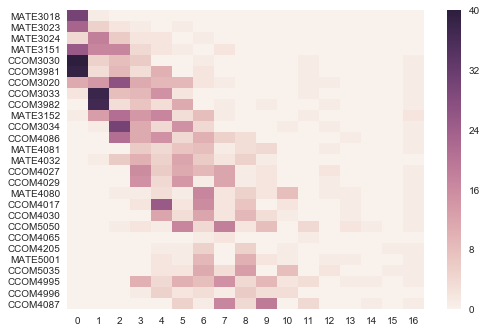

In [82]:
ax = sns.heatmap(heatmap(clean(aorb_calc_stu, prog2016), prog2016),cmap = None)

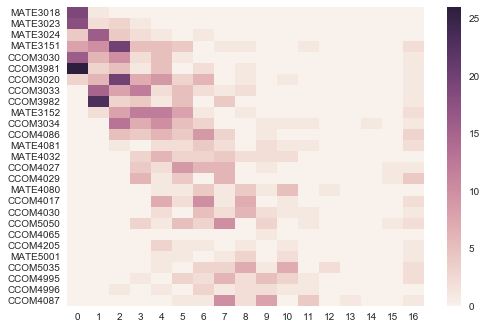

In [83]:
ax = sns.heatmap(heatmap(clean(justc_calc_stu, prog2016), prog2016),cmap = None)

In [84]:
justc_calc_failcounts = failmap(clean(justc_calc_stu, prog2016), prog2016)

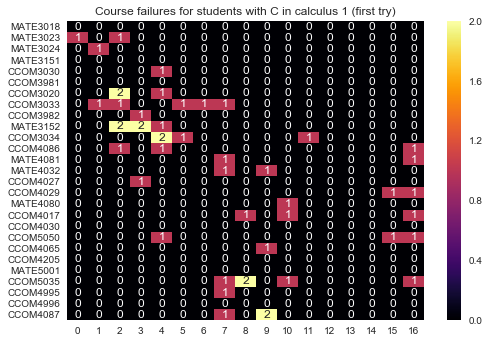

In [85]:
ax = sns.heatmap(justc_calc_failcounts,cmap = "inferno", annot=justc_calc_failcounts)
ax.set(title="Course failures for students with C in calculus 1 (first try)")

In [86]:
dtof_calc_stu = {k: v for k, v in discrete_stu.items() if got(v, 'MATE3151', "DFW")}

In [87]:
dtof_calc_failcounts = failmap(clean(dtof_calc_stu, prog2016), prog2016)

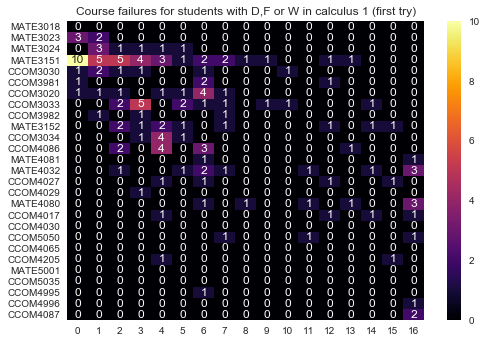

In [88]:
ax = sns.heatmap(dtof_calc_failcounts,cmap = "inferno", annot=dtof_calc_failcounts)
ax.set(title="Course failures for students with D,F or W in calculus 1 (first try)")

Wow, that's an interesting last column. The last column represents students taking courses more than 8 years after their first semester. Students with a D or F in calculus are still failing math (and compilers) more than 8 years after starting!